# **Welcome to Linear Regression Assignment Quiz**

### Data.csv

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

EDA

- -> null values
- -> duplicates values
- -> unwanted data or data columns
- -> outliers (find and remove)
- -> label encoding
- -> Feature/column selection
- -> building model


In [2]:
# Import the required dataset
df = pd.read_csv(r'D:\Intellipaat\Datasets\data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Exploratory Data Analysis

In [3]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
# check the no. of null values for each columns
print('Total null values :-', df.isna().sum().sum())

Total null values :- 0


In [5]:
# Check for the duplicate records 
print('Total duplicate records :-', df.duplicated().sum())

Total duplicate records :- 0


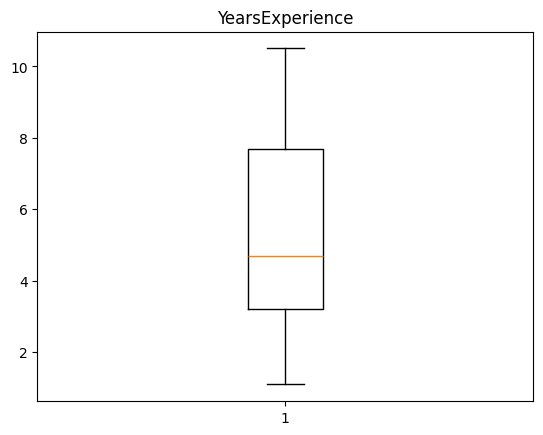

In [6]:
# display a boxplot to see whether the experience column has an outliers or not
plt.boxplot(df['YearsExperience'])
plt.title('YearsExperience')
plt.show()

Inference :- Our independent variables doesn't have any outliers

In [7]:
# Check the correlation of all columns with target variable
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Inference :- As we have only single column except the target variable, obviously its gonna have high correlation
             with the target variable.

In [8]:
# Create a dataframe of independent variable & dependent variable
X = pd.DataFrame(df['YearsExperience'])
y = pd.DataFrame(df['Salary'])
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [9]:
y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [10]:
# import the train_test_split class
from sklearn.model_selection import train_test_split

In [11]:
# Get the train & test data from train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21)

In [12]:
# Check whether the shape of both train & test data are equal or not
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18, 1)
(12, 1)
(18, 1)
(12, 1)


In [13]:
# import linear regression class
from sklearn.linear_model import LinearRegression
model = LinearRegression()          # instance of linear regression class

In [14]:
# fitting the model / training the model
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Intercept
model.intercept_            # Beta 0

array([25336.16988888])

In [16]:
# Coefficient
model.coef_                 # Beta 1

array([[9224.76577246]])

In [17]:
# Get the y_predicted from the model 
y_predicted = model.predict(X_test)                                 # Got y_predicted in array type
y_predicted = pd.DataFrame(y_predicted, columns=['Salary_predicted'])         # Converting into df
y_predicted

,Salary_predicted
0,52087.990629
1,100979.249223
2,98211.819491
3,120351.257345
4,37328.365393
5,90832.006873
6,80684.764524
7,54855.420361
8,113893.921304
9,62235.232979


In [18]:
# Editing the dataframe of actual y (y_test)
y_test.rename(columns={'Salary' : 'Salary_actual'}, inplace=True)
y_test.reset_index(inplace=True)                                    # reset index to start from 0
y_test.drop(columns='index', inplace=True)                          # dropping additional index column created by 'reset_index'
y_test

,Salary_actual
0,56642.0
1,113812.0
2,101302.0
3,122391.0
4,46205.0
5,98273.0
6,93940.0
7,54445.0
8,112635.0
9,55794.0


In [19]:
# concatenate actual_salary & predicted_salary to analyze(see) the difference (between both) manually.
pd.concat([y_test, y_predicted], axis=1)

,Salary_actual,Salary_predicted
0,56642.0,52087.990629
1,113812.0,100979.249223
2,101302.0,98211.819491
3,122391.0,120351.257345
4,46205.0,37328.365393
5,98273.0,90832.006873
6,93940.0,80684.764524
7,54445.0,54855.420361
8,112635.0,113893.921304
9,55794.0,62235.232979


In [20]:
# import metrics & analyze the errors
from sklearn import metrics

In [21]:
# Metrics

# MAE (Mean Absolute Error)
MAE = metrics.mean_absolute_error(y_test, y_predicted)

# MSE (Mean Squared Error)
MSE = metrics.mean_squared_error(y_test, y_predicted)

# RMSE (Root Mean Squared Error)
RMSE = metrics.root_mean_squared_error(y_test, y_predicted)

# Print the error values
print("MAE :", MAE)
print("MSE :", MSE)
print("RMSE :", RMSE)

MAE : 5483.199040982923
MSE : 47564840.41388013
RMSE : 6896.726789853295


In [22]:
# R^2_score (Coefficient of determination)
R2 = metrics.r2_score(y_test, y_predicted)
print("R2_score :-",R2)
print(f"Accuracy of model :- {round(R2*100, 2)} %")

R2_score :- 0.93324072176029
Accuracy of model :- 93.32 %


We can say that, <br/>
-> the model is actually explaining the 94 % variance <br/>
-> loosely we can interpret it 94 % accurate

End of Data.csv

---

### Housing.csv

In [23]:
# Import the required dataset
df_housing = pd.read_csv(r'D:\Intellipaat\Datasets\Housing.csv')
df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis

In [24]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [25]:
# Check the no. of null value for each column
df_housing.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Inference :- There are no null values in the dataset.

In [26]:
# Check for the duplicate records
df_housing.duplicated().sum()

0

Inference :- There is no such records that were repeated.

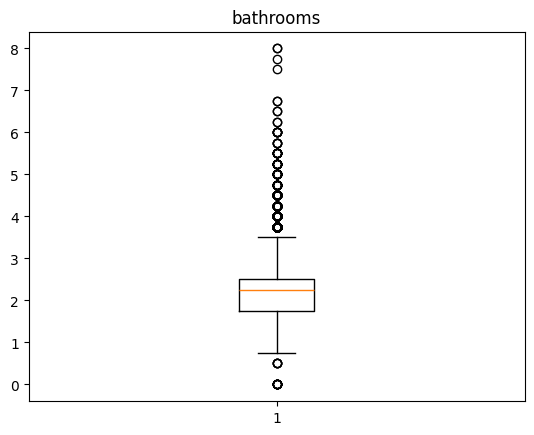

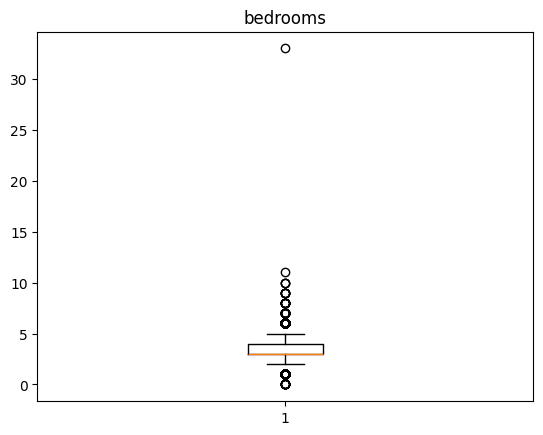

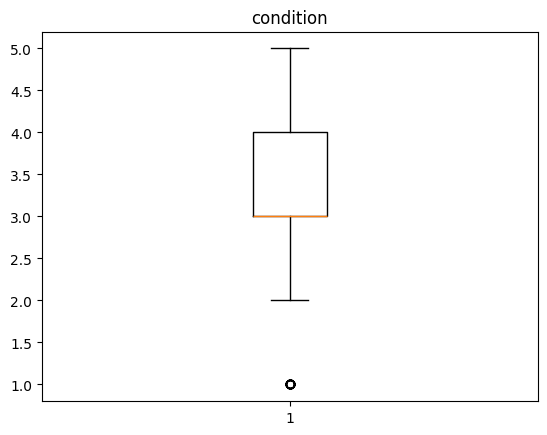

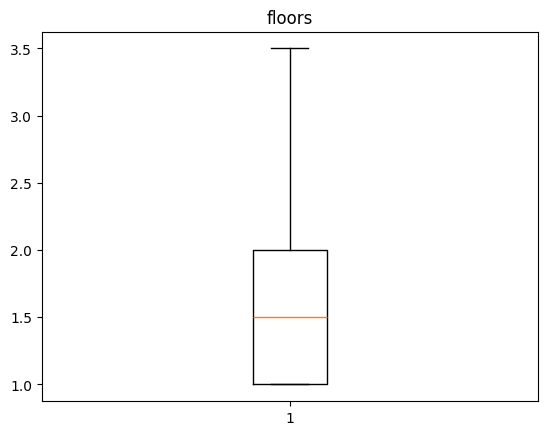

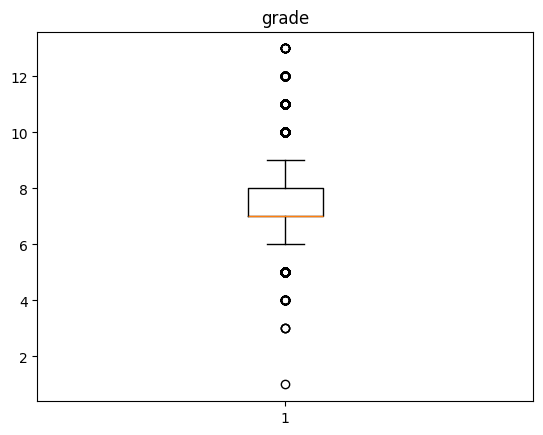

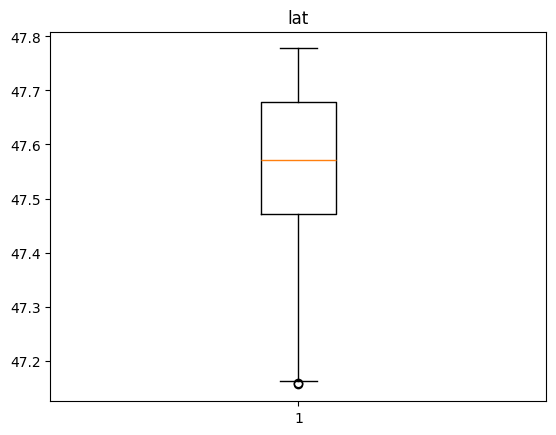

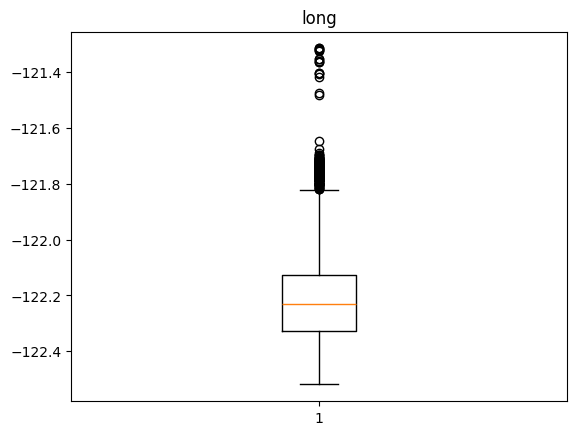

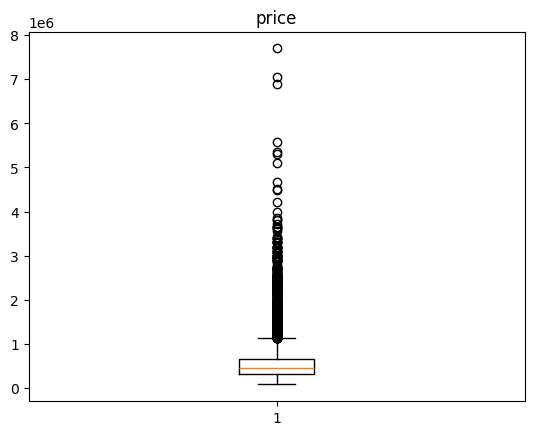

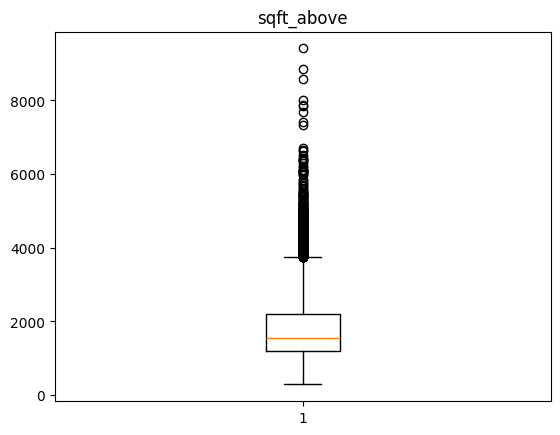

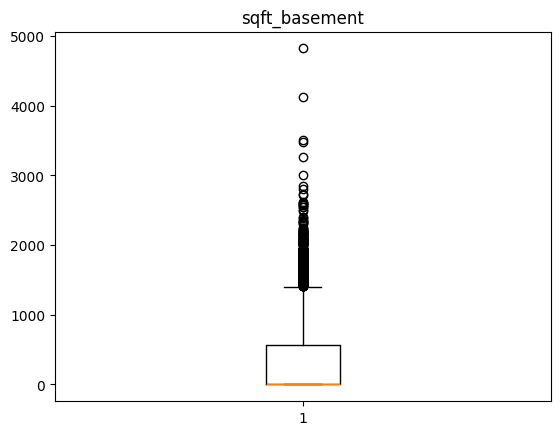

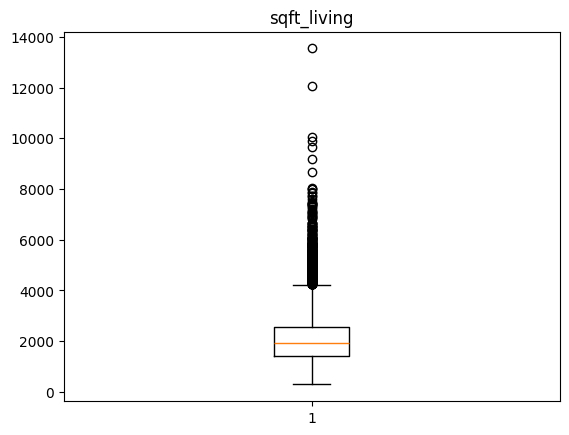

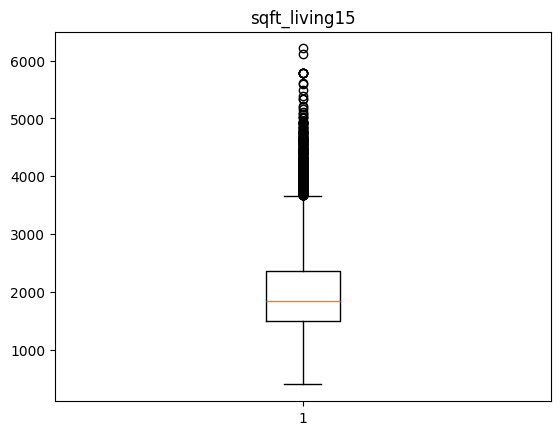

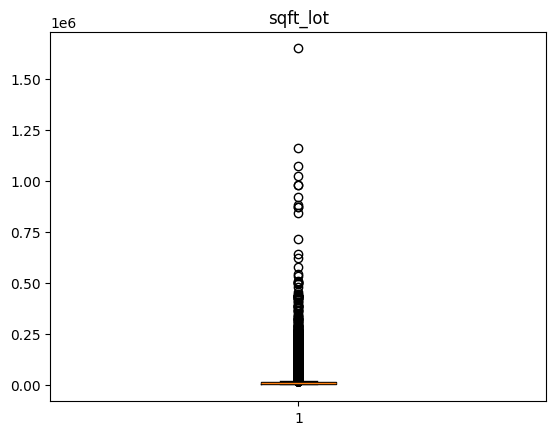

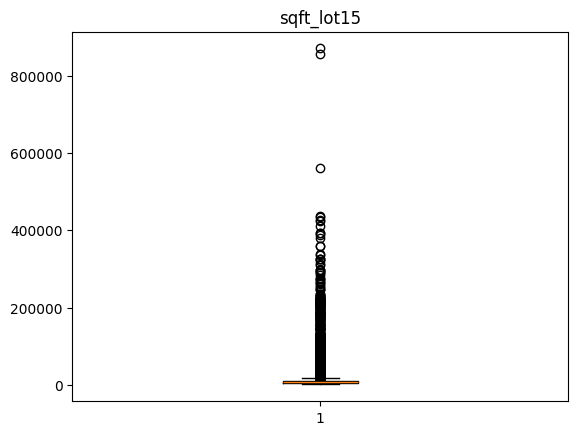

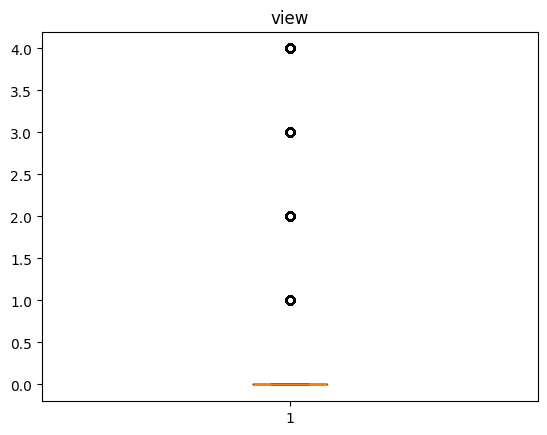

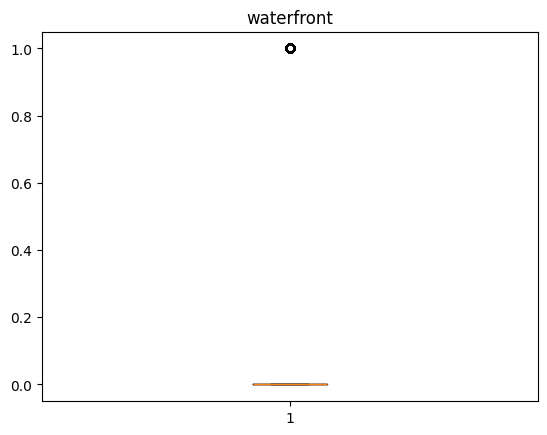

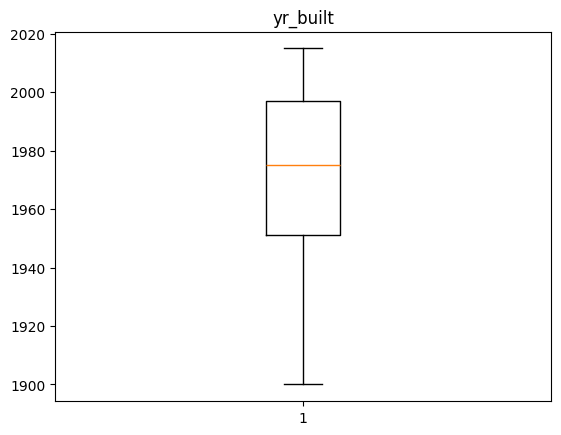

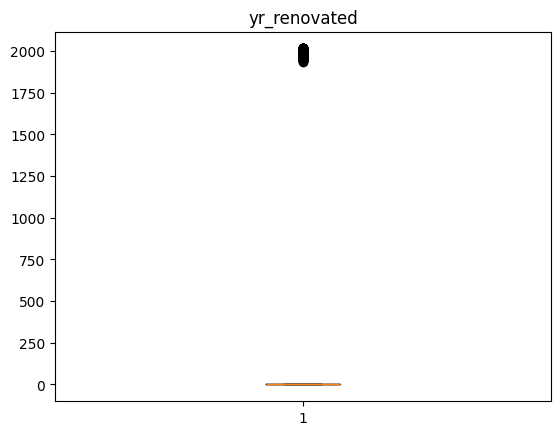

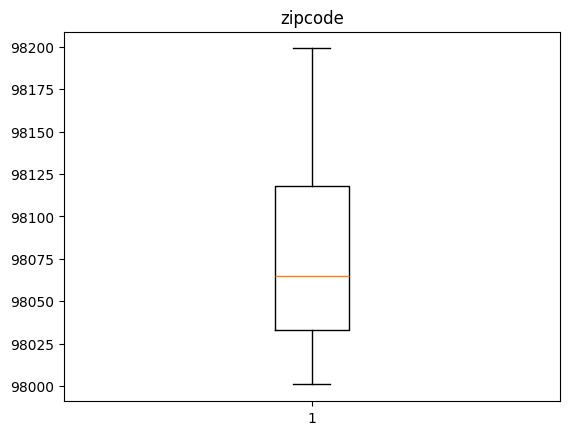

In [27]:
# display the box plot to analyze which column have outliers
for i in df_housing.columns.difference(['id']):                 # All columns except 'id'
    if df_housing[i].dtype != 'object':
        plt.boxplot(df_housing[i])
        plt.title(i)
        plt.show()

Note :- Some columns like sqft_lot, sqft_lot15, view, waterfront, yr_renovated have multiple values inside them but <br/>
        some values has more than 90-95 % of data so other values are taken as outliers by plot which were actually not <br/> 
        as we can see it didn't make proper box, so these column will not taken in outliers_column.

In [28]:
# Create an array of the columns having outliers
outliers_column = ['bathrooms', 'bedrooms', 'condition', 'grade', 'lat', 'long', 'price', 'sqft_above', 
                   'sqft_basement', 'sqft_living', 'sqft_living15']

In [29]:
df_housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [30]:
# Deal with the outliers (By IQR)
for i in outliers_column:
    Q1 = df_housing[i].quantile(0.25)
    Q3 = df_housing[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df_housing = df_housing[(df_housing[i] >= lower_limit) & (df_housing[i] <= upper_limit)]

In [31]:
df_housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


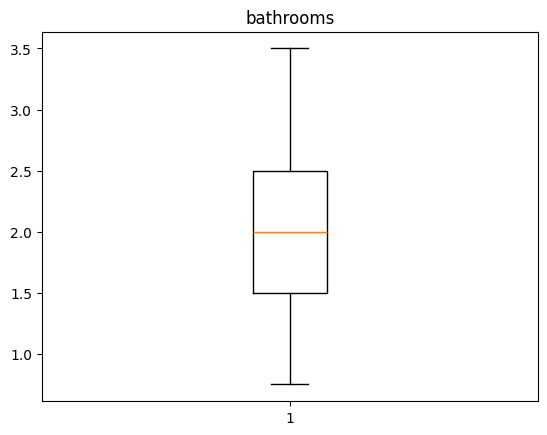

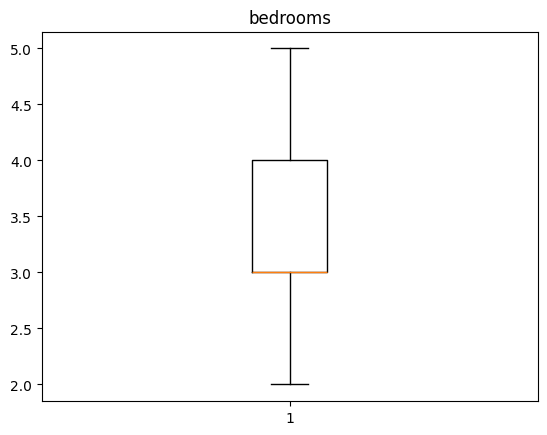

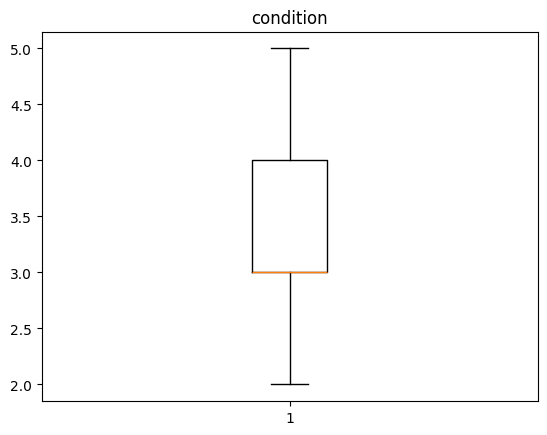

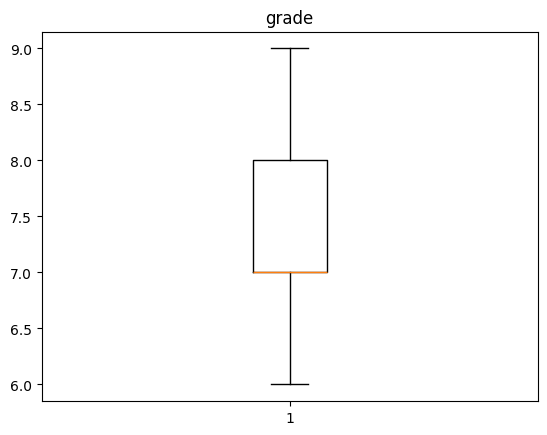

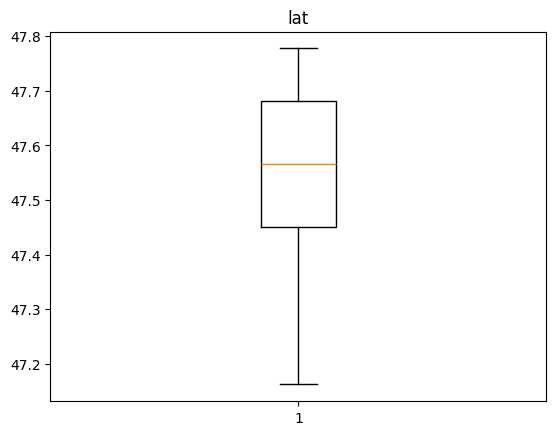

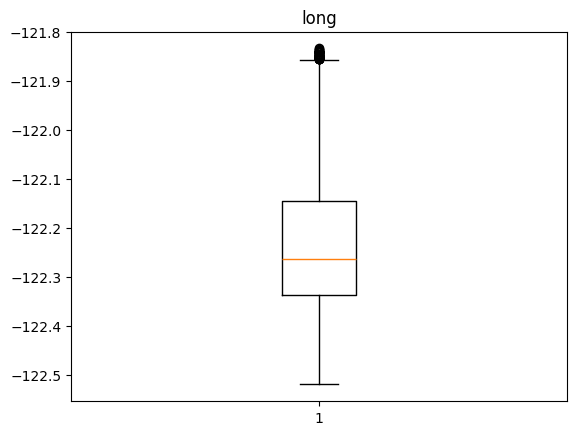

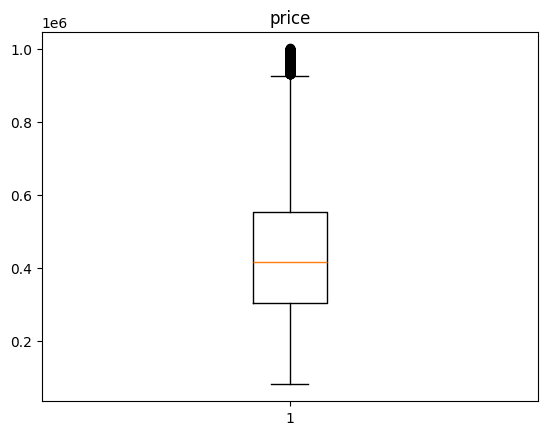

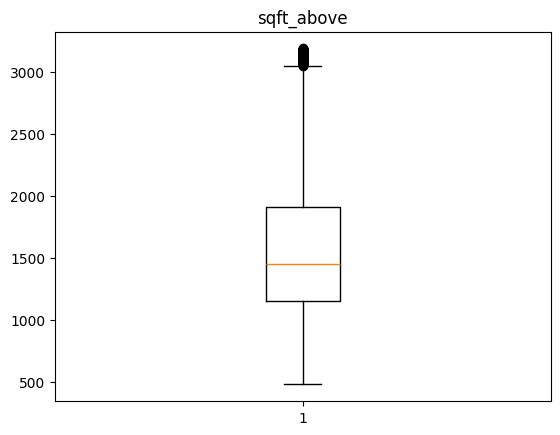

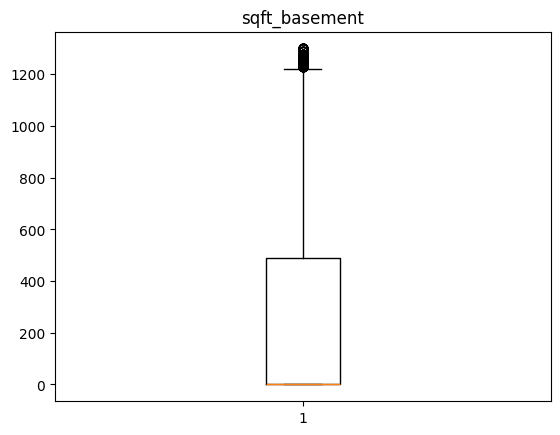

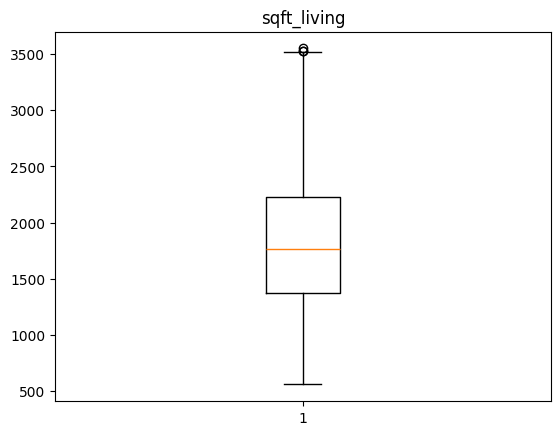

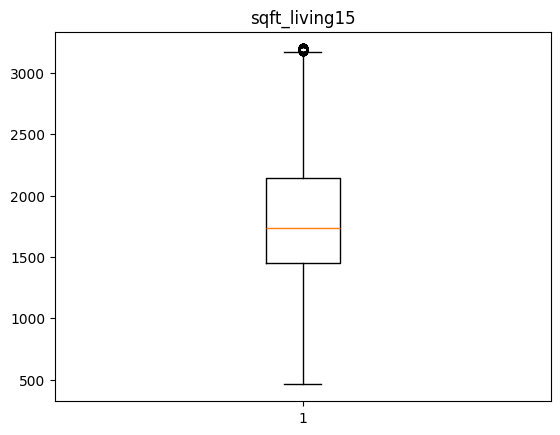

In [32]:
# Check whether the outliers removed or not
for i in outliers_column:
    plt.boxplot(df_housing[i])
    plt.title(i)
    plt.show()

Here we can see some plot are showing the outliers, but they are not. <br/><br/>
**Reason** :- <br/>
When we removed the outliers with the IQR method the extreme outliers which were far away from lower limit <br/>
or upper limit were removed, now the value which are nearby the limits became new outliers which can be ignored <br/> 
because it won't affect out target variable, so we will not treat them as outliers.

In [33]:
# Analyze dataframe
df_housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Now we will not convert 'date' column because after all its not needed for our target variable, so this is our final dataframe (after EDA)

In [34]:
df_housing.drop(columns=['id', 'date'], inplace=True)

NOW the linear regression part

<Axes: >

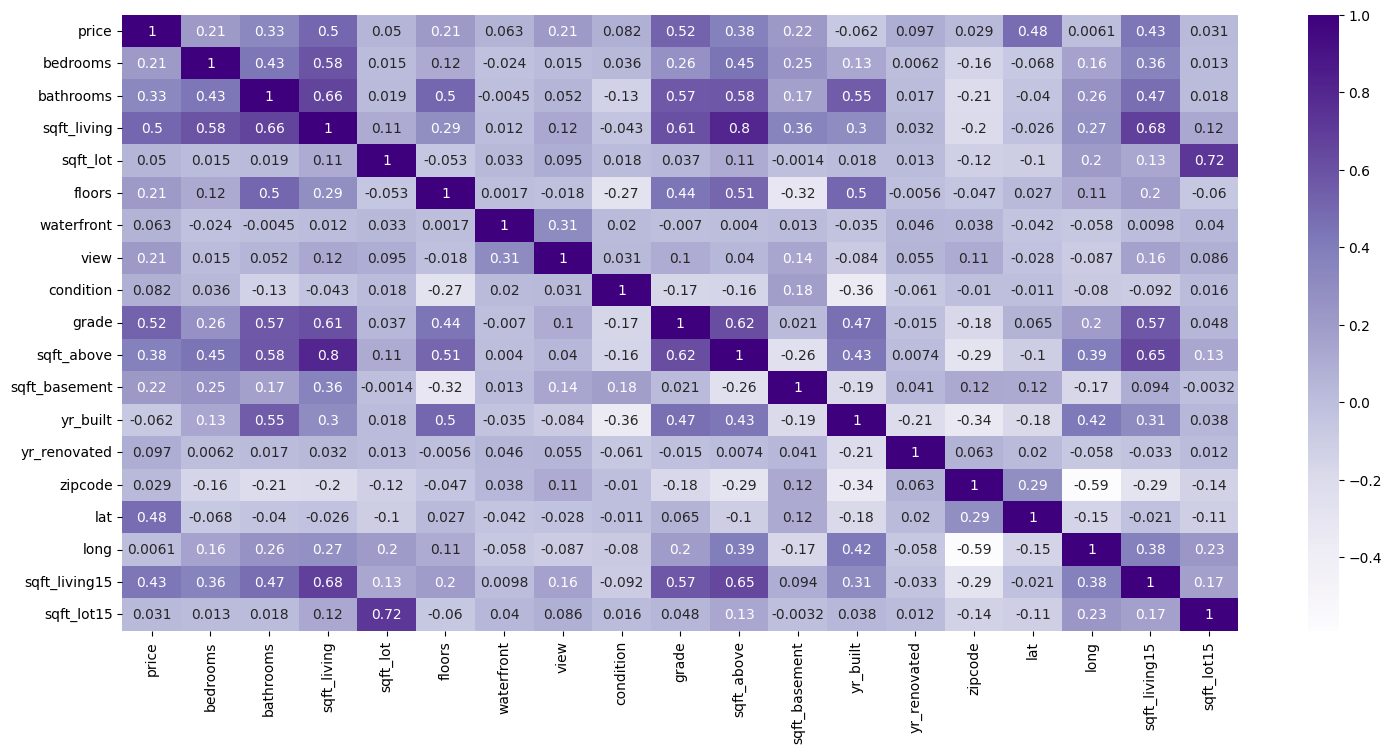

In [35]:
# Check the correlation of all columns with target variable (price)
plt.figure(figsize=(18, 8))
sns.heatmap(df_housing.corr(numeric_only=True), annot=True, cmap='Purples')

In [36]:
# Initialize independent & dependent variable
X = pd.DataFrame(df_housing[['sqft_living', 'grade', 'lat']])
y = pd.DataFrame(df_housing['price'])
X.head()

,sqft_living,grade,lat
0,1180,7,47.5112
1,2570,7,47.7210
2,770,6,47.7379
3,1960,7,47.5208
4,1680,8,47.6168


In [37]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [38]:
# Get the train & test data from train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 21)

In [39]:
# Check whether the shape of both train & test data are equal or not
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13910, 3)
(3478, 3)
(13910, 1)
(3478, 1)


In [40]:
# import Linear Regression class
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [41]:
# fitting the model / training the model
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# intercept
model.intercept_            # Beta 0

array([-27649913.35674301])

In [43]:
# coefficient
model.coef_                 # Beta 1

array([[1.02580378e+02, 6.18765299e+04, 5.77235995e+05]])

In [44]:
# Get the y_predicted from model & convert into df
y_predicted = model.predict(X_test)                                     # Got y_predicted in array type
y_predicted = pd.DataFrame(y_predicted, columns=['y_pred'])             # converting into df
y_predicted

,y_pred
0,445588.946764
1,451316.932763
2,288109.266199
3,352277.626121
4,653010.050667
...,...
3473,435725.646103
3474,410910.986571
3475,461059.222450
3476,482235.775179


In [45]:
# Editing the dataframe of actual y (y_test)
y_test.rename(columns={'charges' : 'y_actual'}, inplace=True)       # renaming 'charges' to 'y_actual'
y_test.reset_index(inplace=True)                                    # reset index to start from 0
y_test.drop(columns='index', inplace=True)                          # dropping additional index column created by 'reset_index'
y_test

,price
0,305000
1,445500
2,226000
3,585000
4,675750
...,...
3473,462000
3474,430000
3475,595000
3476,500000


In [46]:
# concatenate y_actual & y_predicted to analyze (see) the difference (between both) manually
pd.concat([y_test, y_predicted], axis=1)

,price,y_pred
0,305000,445588.946764
1,445500,451316.932763
2,226000,288109.266199
3,585000,352277.626121
4,675750,653010.050667
...,...,...
3473,462000,435725.646103
3474,430000,410910.986571
3475,595000,461059.222450
3476,500000,482235.775179


In [47]:
# import metrics 
from sklearn import metrics

In [48]:
# Metrics

# MAE (Mean Absolute Error)
MAE = metrics.mean_absolute_error(y_test, y_predicted)

# MSE (Mean Squared Error)
MSE = metrics.mean_squared_error(y_test, y_predicted)

# RMSE (Root Mean Squared Error)
RMSE = metrics.root_mean_squared_error(y_test, y_predicted)

# Print the error values
print("MAE :", MAE)
print("MSE :", MSE)
print("RMSE :", RMSE)

MAE : 92162.59073219556
MSE : 14826682243.889486
RMSE : 121764.86457057096


In [49]:
# R^2_score (Coefficient of determination)
R2 = metrics.r2_score(y_test, y_predicted)
print("R2_score :-",R2)
print(f"Accuracy of model :- {round(R2*100, 2)} %")

R2_score :- 0.5372771946587767
Accuracy of model :- 53.73 %


In [50]:
# Needed for Adjusted R2
n = len(X_test)                     # Total no. of observation/rows
k = len(X_test.iloc[0])             # Total no. of independent variables

In [51]:
# Adjusted R^2   (used when there are multiple variables)
Adj_R2 = (1 - ((1 - R2)*(n - 1) / (n - k - 1)))
print("Adjusted R2_score :-", Adj_R2)
print(f"Accuracy of model :- {round(Adj_R2*100, 2)} %")

Adjusted R2_score :- 0.5368776067439742
Accuracy of model :- 53.69 %


END

---